<a href="https://colab.research.google.com/github/Psousace/Fundos_Imobiliarios/blob/main/FIIs_LOG_PAS_Retorno_di%C3%A1rio_e_acumulado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fonte: Trading com Dados
### Link Video: https://www.youtube.com/watch?v=yYmBvNGAECs&t=148s

# 0. Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests

In [ ]:
# Instalando Modulos necessários

!pip install sgs
!pip install python-bcb
!pip install --upgrade gspread # usado para manipular google planilhas

from bcb import sgs
import pandas as pd
import numpy as np


### Utilizabdo Funds Exploprer

In [ ]:
headers = {
    'authority': 'www.fundsexplorer.com.br',
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'pt-BR,pt;q=0.5',
    'referer': 'https://www.fundsexplorer.com.br/ranking',
    'sec-ch-ua': '"Not/A)Brand";v="99", "Brave";v="115", "Chromium";v="115"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'sec-gpc': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
    'x-funds-nonce': '61495f60b533cc40ad822e054998a3190ea9bca0d94791a1da',
}

response = requests.get('https://www.fundsexplorer.com.br/wp-json/funds/v1/get-ranking', headers=headers)

In [ ]:
df = pd.read_json(response.json())

# 1. Construção da carteira

In [ ]:
# Período
inicio = '2022-08-01'
fim = '2023-08-01'

# Seleção dos ativos da carteira
ativos = ['BLMG11.SA','BRCO11.SA', 'BTLG11.SA','GALG11.SA', 'HGLG11.SA' ,'HLOG11.SA', 'LGCP11.SA', 'LVBI11.SA', 'NEWL11.SA', 'PATL11.SA', 'RBRL11.SA', 'RZAT11.SA', 'TRBL11.SA', 'XPLG11.SA' ]

In [ ]:
pesos = np.array([0.007,0.034,0.0468,0.0413,0.3932,0.0462,0.0196,0.0852,0.0257,0.0166, 0.0566, 0.0231, 0.0667, 0.1379])

In [ ]:
carteira = yf.download(ativos, start = inicio, end = fim)['Adj Close']
carteira

[*********************100%%**********************]  14 of 14 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RZAT11.SA']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


,BLMG11.SA,BRCO11.SA,BTLG11.SA,GALG11.SA,HGLG11.SA,HLOG11.SA,LGCP11.SA,LVBI11.SA,NEWL11.SA,PATL11.SA,RBRL11.SA,RZAT11.SA,TRBL11.SA,XPLG11.SA
Date,,,,,,,,,,,,,,
2022-08-01,72.815346,90.780273,92.044052,8.863688,152.173569,79.509827,70.561829,91.742241,83.888695,69.743004,78.068726,NaN,NaN,87.779701
2022-08-02,71.962646,91.651649,91.626694,8.932099,152.228455,79.491486,70.625687,92.953476,84.511414,69.607666,79.100868,NaN,NaN,87.788834
2022-08-03,72.575829,91.138008,91.780937,8.941734,152.530426,79.913338,70.151329,92.678200,84.244537,69.868683,78.954712,NaN,NaN,87.046661
2022-08-04,72.796196,91.725044,90.909935,8.911863,153.289871,79.601532,70.780769,92.843353,84.244537,69.549644,79.347488,NaN,NaN,87.486465
2022-08-05,73.246483,91.504913,91.082336,8.906083,153.802231,80.509415,70.753395,93.136986,84.333488,69.201614,79.694565,NaN,NaN,88.091209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,66.549141,119.869270,105.614151,9.058269,163.530640,94.723793,85.131706,115.239281,112.264870,70.915771,93.361542,NaN,99.222427,113.073685
2023-07-26,66.559044,118.658073,105.772964,9.058269,162.398315,94.455620,84.863716,116.709328,112.314461,69.685905,94.026993,NaN,99.192642,113.321976
2023-07-27,66.658012,118.638214,105.028503,9.038447,162.547302,95.329666,84.903419,116.659660,111.074783,70.132225,94.066719,NaN,99.133102,113.570274


In [ ]:
df = carteira

In [ ]:
carteira

,BLMG11.SA,BRCO11.SA,BTLG11.SA,GALG11.SA,HGLG11.SA,HLOG11.SA,LGCP11.SA,LVBI11.SA,NEWL11.SA,PATL11.SA,RBRL11.SA,RZAT11.SA,TRBL11.SA,XPLG11.SA
Date,,,,,,,,,,,,,,
2022-08-01,72.815346,90.780289,92.044052,8.863688,152.173569,79.509819,70.561829,91.742233,83.888695,69.742996,78.068726,NaN,NaN,87.779686
2022-08-02,71.962646,91.651665,91.626709,8.932099,152.228455,79.491478,70.625694,92.953476,84.511421,69.607658,79.100868,NaN,NaN,87.788841
2022-08-03,72.575829,91.138008,91.780937,8.941734,152.530441,79.913330,70.151321,92.678200,84.244530,69.868690,78.954735,NaN,NaN,87.046654
2022-08-04,72.796188,91.725044,90.909935,8.911863,153.289841,79.601524,70.780785,92.843361,84.244530,69.549652,79.347466,NaN,NaN,87.486488
2022-08-05,73.246483,91.504890,91.082344,8.906083,153.802261,80.509415,70.753410,93.136986,84.333481,69.201614,79.694580,NaN,NaN,88.091217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,66.549141,119.869270,105.614151,9.058269,163.530640,94.723793,85.131706,115.239281,112.264870,70.915771,93.361542,NaN,99.222427,113.073685
2023-07-26,66.559044,118.658073,105.772964,9.058269,162.398315,94.455620,84.863716,116.709328,112.314461,69.685905,94.026993,NaN,99.192642,113.321976
2023-07-27,66.658012,118.638214,105.028503,9.038447,162.547302,95.329666,84.903419,116.659660,111.074783,70.132225,94.066719,NaN,99.133102,113.570274


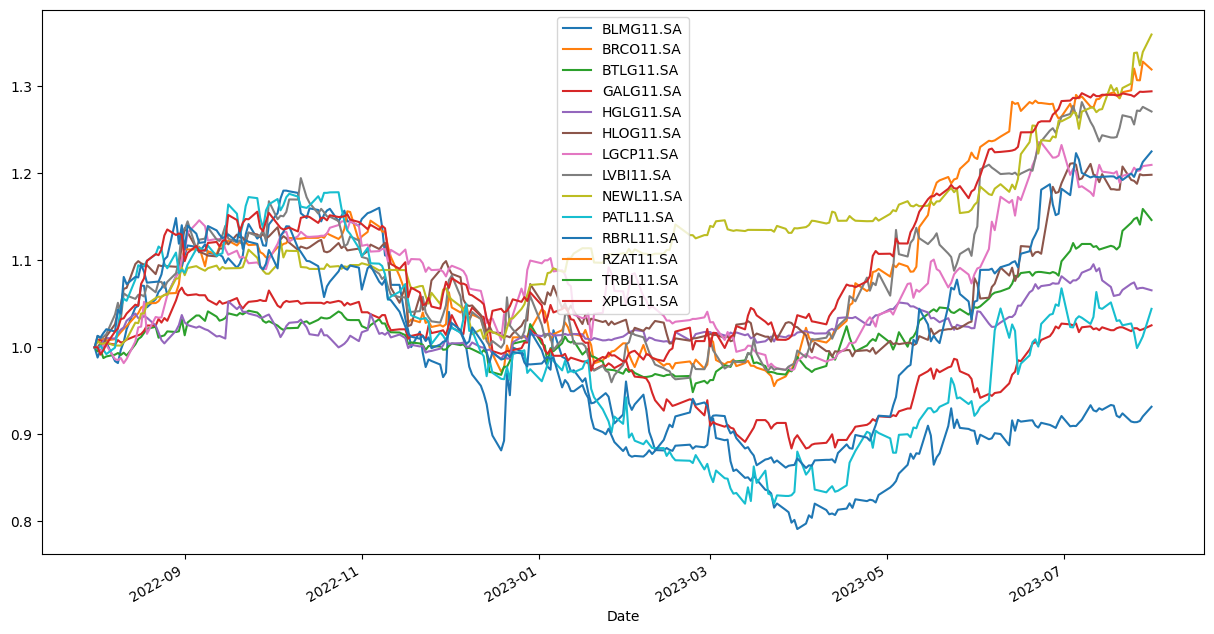

In [ ]:
(carteira/carteira.iloc[0]).plot(figsize=(15,8));

# 2. Retorno diário e o retorno acumulado

In [ ]:
retornos = carteira.pct_change()
retornos

,BLMG11.SA,BRCO11.SA,BTLG11.SA,GALG11.SA,HGLG11.SA,HLOG11.SA,LGCP11.SA,LVBI11.SA,NEWL11.SA,PATL11.SA,RBRL11.SA,RZAT11.SA,TRBL11.SA,XPLG11.SA
Date,,,,,,,,,,,,,,
2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-02,-0.011710,0.009599,-0.004534,0.007718,0.000361,-0.000231,0.000905,0.013203,0.007423,-0.001941,0.013221,NaN,NaN,0.000104
2022-08-03,0.008521,-0.005604,0.001683,0.001079,0.001984,0.005307,-0.006717,-0.002961,-0.003158,0.003750,-0.001847,NaN,NaN,-0.008454
2022-08-04,0.003036,0.006441,-0.009490,-0.003341,0.004979,-0.003902,0.008973,0.001782,0.000000,-0.004566,0.004974,NaN,NaN,0.005053
2022-08-05,0.006186,-0.002400,0.001896,-0.000649,0.003343,0.011405,-0.000387,0.003163,0.001056,-0.005004,0.004375,NaN,NaN,0.006912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,-0.000892,0.019333,0.003774,0.003293,0.001460,-0.000943,0.005510,-0.006508,0.026944,-0.010381,-0.003181,NaN,0.002005,-0.001316
2023-07-26,0.000149,-0.010104,0.001504,0.000000,-0.006924,-0.002831,-0.003148,0.012756,0.000442,-0.017343,0.007128,NaN,-0.000300,0.002196
2023-07-27,0.001487,-0.000167,-0.007038,-0.002188,0.000917,0.009254,0.000468,-0.000426,-0.011038,0.006405,0.000422,NaN,-0.000600,0.002191


Retorno diário da carteira

In [ ]:
retorno_carteira = (retornos*pesos).sum(axis = 1)
retorno_carteira

Date
2022-08-01    0.000000
2022-08-02    0.002546
2022-08-03   -0.000656
2022-08-04    0.002666
2022-08-05    0.003272
                ...   
2023-07-25    0.001340
2023-07-26   -0.001691
2023-07-27    0.000455
2023-07-28    0.002016
2023-07-31   -0.000321
Length: 250, dtype: float64

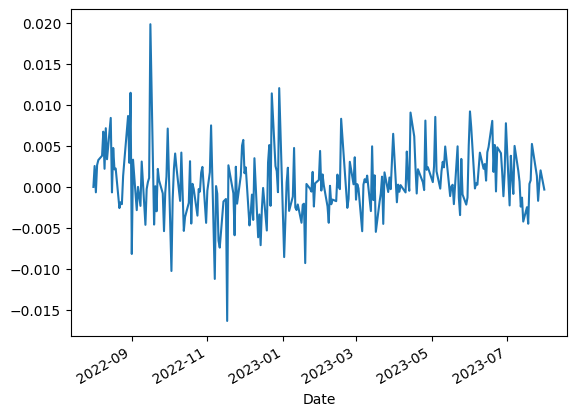

In [ ]:
retorno_carteira.plot();

### Retorno acumulado

In [ ]:
retorno_acumulado_carteira = (1 + retorno_carteira).cumprod() - 1
retorno_acumulado_carteira

Date
2022-08-01    0.000000
2022-08-02    0.002546
2022-08-03    0.001889
2022-08-04    0.004559
2022-08-05    0.007846
                ...   
2023-07-25    0.147530
2023-07-26    0.145590
2023-07-27    0.146111
2023-07-28    0.148421
2023-07-31    0.148052
Length: 250, dtype: float64

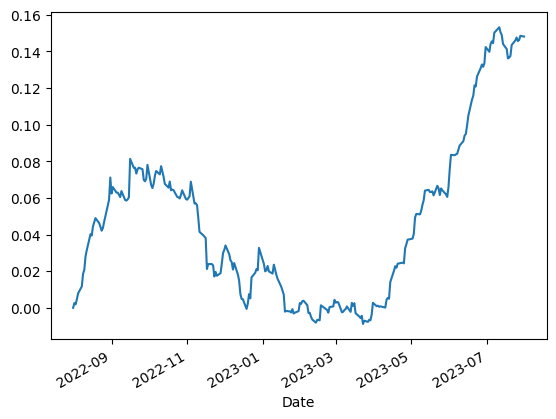

In [ ]:
retorno_acumulado_carteira.plot();

# 3. Comparativo de desempenho

In [ ]:
ifix = yf.download('XFIX11.SA', start = inicio, end = fim)['Adj Close']
ifix_retorno = ifix.pct_change()
retorno_acumulado_ifix = (1 + ifix_retorno).cumprod() - 1

[*********************100%%**********************]  1 of 1 completed


In [ ]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retorno_Carteira Logist'] = retorno_acumulado_carteira
retorno_portfolio['IFIX'] = retorno_acumulado_ifix
retorno_portfolio = retorno_portfolio.dropna()

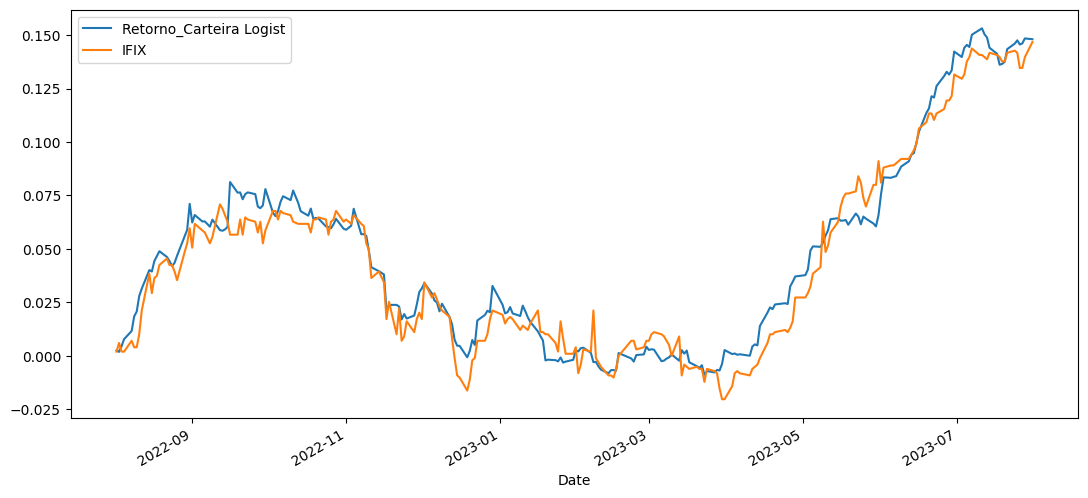

In [ ]:
retorno_portfolio.plot(figsize=(13,6));